Epoch [1/10], Loss: 0.02183910831809044
Epoch [2/10], Loss: 0.015834631398320198
Epoch [3/10], Loss: 0.01643258146941662
Epoch [4/10], Loss: 0.01319526880979538
Epoch [5/10], Loss: 0.012136519886553288
Epoch [6/10], Loss: 0.011775581166148186
Epoch [7/10], Loss: 0.011090682819485664
Epoch [8/10], Loss: 0.012821582145988941
Epoch [9/10], Loss: 0.014443178661167622
Epoch [10/10], Loss: 0.010402243584394455


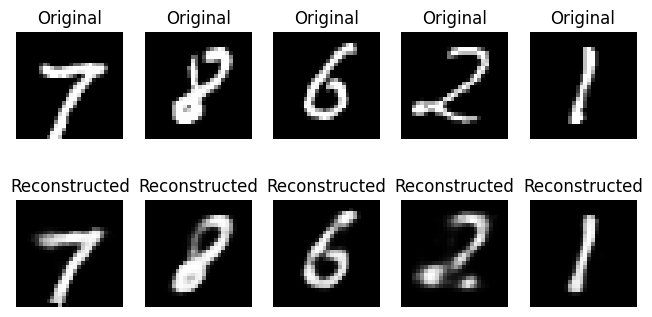

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 잠재 공간의 차원 설정
latent_dim = 32

# 간단한 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 오토인코더 모델 인스턴스 생성
autoencoder = Autoencoder()

# MNIST 데이터셋 불러오기
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = DataLoader(mnist_dataset, batch_size=64, shuffle=True)

# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

# 학습
num_epochs = 10
for epoch in range(num_epochs):
    for data, _ in data_loader:
        # 데이터 전처리
        data = data.view(data.size(0), -1)

        # Forward pass
        outputs = autoencoder(data)

        # Loss 계산 및 역전파
        loss = criterion(outputs, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 에폭마다 손실 출력
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# 학습된 모델을 사용하여 이미지 복원
import matplotlib.pyplot as plt
import numpy as np

with torch.no_grad():
    test_data = next(iter(data_loader))[0][:5]  # 테스트용 데이터 가져오기
    reconstructed = autoencoder(test_data.view(test_data.size(0), -1)).view(-1, 1, 28, 28)

    # 원본 이미지와 복원 이미지 비교
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_data[i].numpy().squeeze(), cmap='gray')
        plt.title('Original')
        plt.axis('off')
        plt.subplot(2, 5, i + 6)
        plt.imshow(reconstructed[i].numpy().squeeze(), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    plt.show()